In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.image as mpimg
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array, smart_resize
import tensorflow as tf
import seaborn as sns
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/MyDrive/Colab Notebooks/RecycleMates'

/content/drive/MyDrive/Colab Notebooks/RecycleMates


# 1. Importing the dataset

In [ ]:
from pathlib import Path
p = Path().cwd()

In [ ]:
target_dict = {'can': 0,
               'cardboard': 1,
               'glass bottle': 2,
               'plastic bottle': 3} # create dictionary mapping you data classes/labels to integer labels


# Importing the data
images1 = np.load(p/"images.npy")
labels1 = np.load(p/"labels.npy")
print(images1.shape)
print(labels1.shape)

(5520, 128, 128, 3)
(5520,)


# 2. Exploring the data

In [ ]:
labels_int = [target_dict.get(e, e) for e in labels1] # use the target_dict to convert the string labels to an array of integers
labels_int = np.array(labels_int) # convert the list of int labels to a NumPy array

In [ ]:
unique, counts = np.unique(labels_int, return_counts=True)
dict(zip(unique, counts))

{0: 1414, 1: 1021, 2: 1448, 3: 1637}

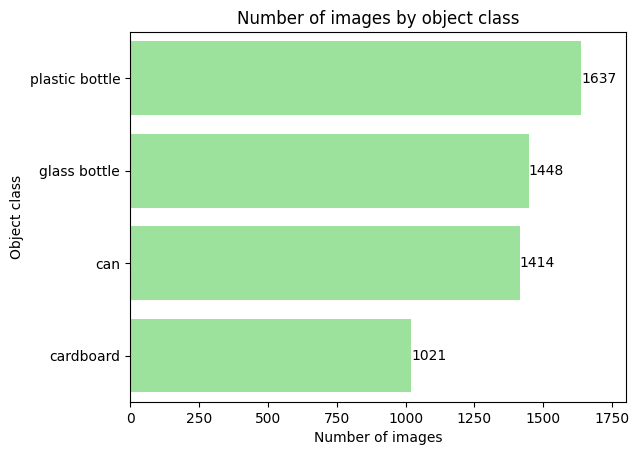

In [ ]:
# Create a DataFrame
objects = pd.DataFrame(labels1, columns=['Object'])

# Count the occurrences of each object
object_counts = objects['Object'].value_counts()

# Get the sorted order based on the counts
sorted_order = object_counts.index

# Plotting the countplot with ordered bars and horizontal orientation
sns.countplot(y='Object', data = objects, order = sorted_order, color = 'lightgreen')

# Adding count values at the top of each bar
for i, count in enumerate(object_counts):
    plt.annotate(str(count), (count, i), ha='left', va='center')

# Adding labels and title
plt.xlabel('Number of images')
plt.ylabel('Object class')
plt.title('Number of images by object class')

# Set the y-axis limit
plt.xlim(-0.5, 1800)

# Display the chart
plt.show()

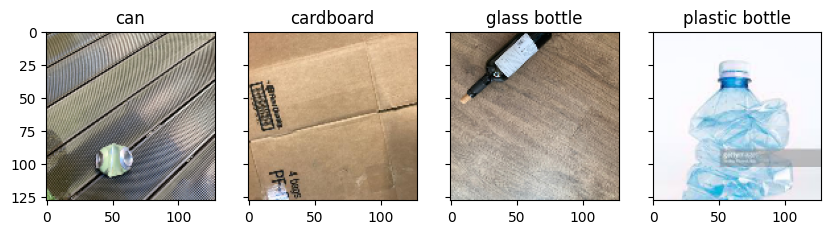

In [ ]:
import random

can_i = random_number = random.randint(1, 1414)
cardboard_i = random_number = random.randint(1415, 1414+1021)
glassbottle_i = random_number = random.randint(1414+1021, 1414+1021+1448)
plasticbottle_i = random_number = random.randint(1414+1021+1448, 1414+1021+1448+1637)

f, axarr = plt.subplots(1, 4, sharey=True, figsize=(10, 10))
axarr[0].set_title(labels1[can_i])
axarr[0].imshow(images1[can_i]/255)
axarr[1].set_title(labels1[cardboard_i])
axarr[1].imshow(images1[cardboard_i]/255)
axarr[2].set_title(labels1[glassbottle_i])
axarr[2].imshow(images1[glassbottle_i]/255)
axarr[3].set_title(labels1[plasticbottle_i])
axarr[3].imshow(images1[plasticbottle_i]/255)

# 3. Creating the models

In [ ]:
from sklearn.model_selection import train_test_split
# 70% for training, 20% for validation, and 10% for testing
X_train, X_test, y_train, y_test = train_test_split(images1, labels_int, test_size=0.1, random_state=42)

In [ ]:
## Shuffle the dataset
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [ ]:
# Normalizing the data and reshaping
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
# Shape of the training dataset
X_train.shape

(4968, 128, 128, 3)

In [ ]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, MaxPool2D
from tensorflow.keras import optimizers
from tensorflow.keras import losses

y_train = to_categorical(y_train, dtype="int")
y_test = to_categorical(y_test, dtype="int")

In [ ]:
image_shape = X_train[0].shape
image_shape

(128, 128, 3)

## 3.1 Baseline model

In [ ]:
# Creating a baseline model
cnn_model = Sequential()
cnn_model.add(Conv2D(32, 2, 2, padding = 'same', input_shape = image_shape, activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (3, 3)))
cnn_model.add(Flatten())
cnn_model.add(Dense(32, activation = 'relu'))
cnn_model.add(Dense(4, activation = 'softmax'))

In [ ]:
cnn_model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 21, 21, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 14112)             0         
                                                                 
 dense (Dense)               (None, 32)                451616    
                                                                 
 dense_1 (Dense)             (None, 4)                 132       
                                                                 
Total params: 452,164
Trainable params: 452,164
Non-trainable params: 0
__________________________________________________

In [ ]:
import time

start_time = time.time()

history = cnn_model.fit(X_train,
                        y_train,
                        batch_size=128,
                        epochs=10,
                        verbose=1,
                        validation_split=0.2)

elapsed_time = time.time() - start_time

print(elapsed_time)

Epoch 1/10
32/32 [==============================] - 15s 46ms/step - loss: 1.4894 - accuracy: 0.3430 - val_loss: 1.5058 - val_accuracy: 0.2897
Epoch 2/10
32/32 [==============================] - 1s 25ms/step - loss: 1.2228 - accuracy: 0.4640 - val_loss: 1.1363 - val_accuracy: 0.5252
Epoch 3/10
32/32 [==============================] - 1s 35ms/step - loss: 1.1171 - accuracy: 0.5184 - val_loss: 1.4158 - val_accuracy: 0.2907
Epoch 4/10
32/32 [==============================] - 1s 33ms/step - loss: 1.0724 - accuracy: 0.5518 - val_loss: 1.1800 - val_accuracy: 0.4517
Epoch 5/10
32/32 [==============================] - 1s 37ms/step - loss: 1.0097 - accuracy: 0.5820 - val_loss: 1.9050 - val_accuracy: 0.2817
Epoch 6/10
32/32 [==============================] - 1s 36ms/step - loss: 0.9901 - accuracy: 0.5944 - val_loss: 1.3126 - val_accuracy: 0.3531
Epoch 7/10
32/32 [==============================] - 1s 26ms/step - loss: 0.9349 - accuracy: 0.6195 - val_loss: 1.1681 - val_accuracy: 0.4708
Epoch 8/10
3

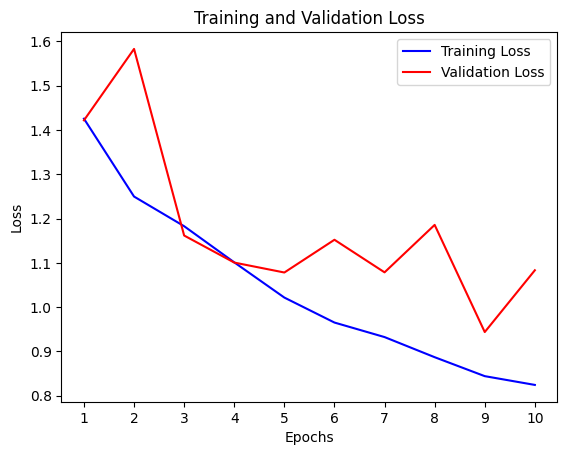

In [ ]:
history_dict = history.history # the dictionary that has the information on loss and accuracy per epoch

loss_values = history_dict['loss']   # training loss
val_loss_values = history_dict['val_loss'] # validation loss

epochs = range(1, len(loss_values)+1)  #creates list of integers to match the number of epochs of training

# code to plot the results
plt.plot(epochs, loss_values, 'b', label="Training Loss")
plt.plot(epochs, val_loss_values, 'r', label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Loss")
plt.legend()
plt.show()

## 3.2 Second Model

In [ ]:
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=image_shape))
model2.add(Conv2D(32, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(4, activation='softmax'))

In [ ]:
# Explore the structure of the NN
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 conv2d_2 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        36928     
                                                      

In [ ]:
model2.compile(loss ='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=0.001),
              metrics =['accuracy'])

In [ ]:
start_time = time.time()

history1 = model2.fit(X_train, y_train,
                      batch_size=128,
                      epochs=10,
                      verbose=1,
                      validation_split=0.2)

elapsed_time = time.time() - start_time

print(elapsed_time)

Epoch 1/10
32/32 [==============================] - 17s 251ms/step - loss: 1.3582 - accuracy: 0.3183 - val_loss: 1.3121 - val_accuracy: 0.3964
Epoch 2/10
32/32 [==============================] - 5s 171ms/step - loss: 1.2670 - accuracy: 0.4225 - val_loss: 1.1430 - val_accuracy: 0.4960
Epoch 3/10
32/32 [==============================] - 6s 174ms/step - loss: 1.0960 - accuracy: 0.5161 - val_loss: 1.0346 - val_accuracy: 0.5724
Epoch 4/10
32/32 [==============================] - 5s 171ms/step - loss: 1.0125 - accuracy: 0.5687 - val_loss: 1.0355 - val_accuracy: 0.5785
Epoch 5/10
32/32 [==============================] - 6s 185ms/step - loss: 0.9602 - accuracy: 0.5971 - val_loss: 1.1543 - val_accuracy: 0.5000
Epoch 6/10
32/32 [==============================] - 6s 174ms/step - loss: 0.8443 - accuracy: 0.6610 - val_loss: 0.9100 - val_accuracy: 0.6439
Epoch 7/10
32/32 [==============================] - 5s 172ms/step - loss: 0.7518 - accuracy: 0.7033 - val_loss: 0.7997 - val_accuracy: 0.6831
Epoch

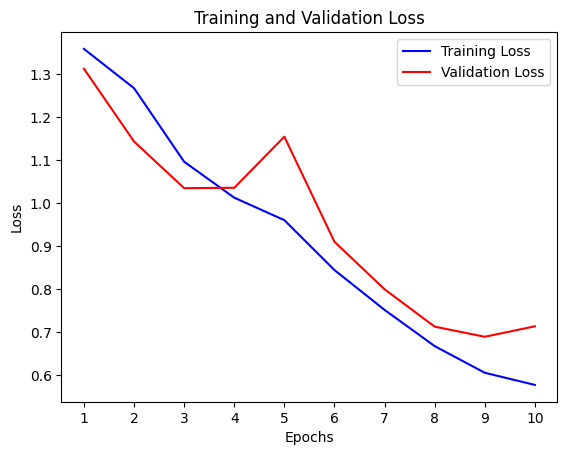

In [ ]:
history_dict = history1.history # the dictionary that has the information on loss and accuracy per epoch

loss_values = history_dict['loss']   # training loss
val_loss_values = history_dict['val_loss'] # validation loss

epochs = range(1, len(loss_values)+1)  #creates list of integers to match the number of epochs of training

# code to plot the results
plt.plot(epochs, loss_values, 'b', label="Training Loss")
plt.plot(epochs, val_loss_values, 'r', label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Loss")
plt.legend()
plt.show()

## Other model

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

model2 = Sequential()
model2.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=image_shape))
model2.add(Conv2D(32, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model2.add(Conv2D(512, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

# Add fully connected layers
model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.25))
model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.25))
model2.add(Dense(4, activation='softmax'))


# Data augmentation configuration
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
model2.compile(loss ='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=0.001),
              metrics =['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Set up training parameters
batch_size = 128
epochs = 100

# Start the timer
start_time = time.time()

# Set up callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

# Fit the model with augmented data
history1 = model2.fit(datagen.flow(X_train, y_train, batch_size=batch_size),
                      steps_per_epoch=len(X_train) // batch_size,
                      epochs=epochs,
                      verbose=1,
                      validation_data=(X_test, y_test))

# Calculate elapsed time
elapsed_time = time.time() - start_time

print("Training time: ", elapsed_time)

Epoch 1/100
38/38 [==============================] - 41s 777ms/step - loss: 1.3680 - accuracy: 0.3089 - val_loss: 1.3333 - val_accuracy: 0.3551
Epoch 2/100
38/38 [==============================] - 23s 604ms/step - loss: 1.2753 - accuracy: 0.4110 - val_loss: 1.2313 - val_accuracy: 0.4728
Epoch 3/100
38/38 [==============================] - 22s 570ms/step - loss: 1.1503 - accuracy: 0.4990 - val_loss: 1.0906 - val_accuracy: 0.5217
Epoch 4/100
38/38 [==============================] - 23s 610ms/step - loss: 1.0744 - accuracy: 0.5506 - val_loss: 1.1430 - val_accuracy: 0.5199
Epoch 5/100
38/38 [==============================] - 23s 613ms/step - loss: 1.0101 - accuracy: 0.5936 - val_loss: 0.9673 - val_accuracy: 0.6377
Epoch 6/100
38/38 [==============================] - 23s 615ms/step - loss: 0.9352 - accuracy: 0.6217 - val_loss: 0.9376 - val_accuracy: 0.6522
Epoch 7/100
38/38 [==============================] - 23s 609ms/step - loss: 0.8995 - accuracy: 0.6351 - val_loss: 1.0412 - val_accuracy:

In [ ]:
model2.save(p/"model_final.h5")

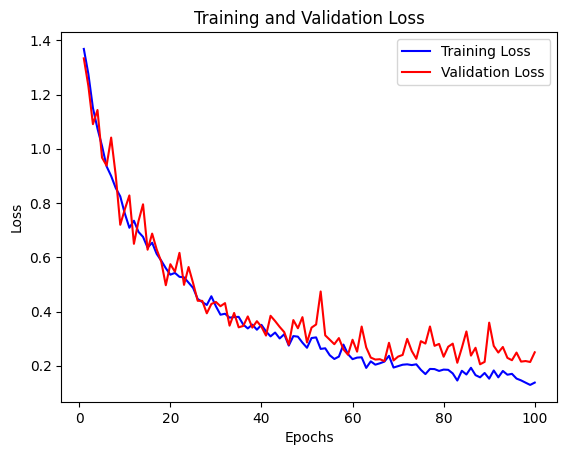

In [ ]:
history_dict = history1.history # the dictionary that has the information on loss and accuracy per epoch

loss_values = history_dict['loss']   # training loss
val_loss_values = history_dict['val_loss'] # validation loss

epochs = range(1, len(loss_values)+1)  #creates list of integers to match the number of epochs of training

# code to plot the results
plt.plot(epochs, loss_values, 'b', label="Training Loss")
plt.plot(epochs, val_loss_values, 'r', label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
#plt.xticks(epochs)
plt.ylabel("Loss")
plt.legend()
plt.show()

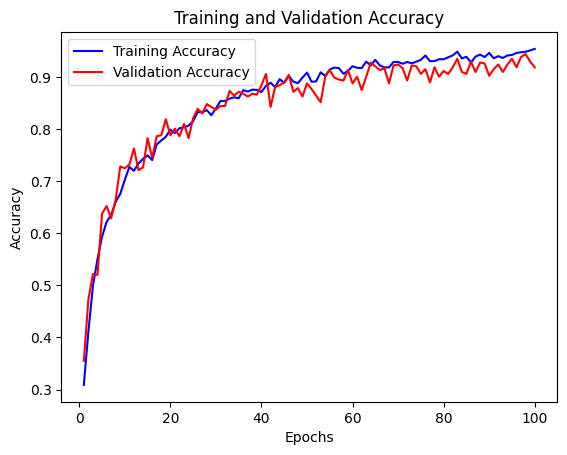

In [ ]:
# As above, but this time we want to visualize the training and validation accuracy
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'b', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
#plt.xticks(epochs)
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# Loading the model
model2 = tf.keras.models.load_model('model_final.h5')

18/18 [==============================] - 8s 32ms/step


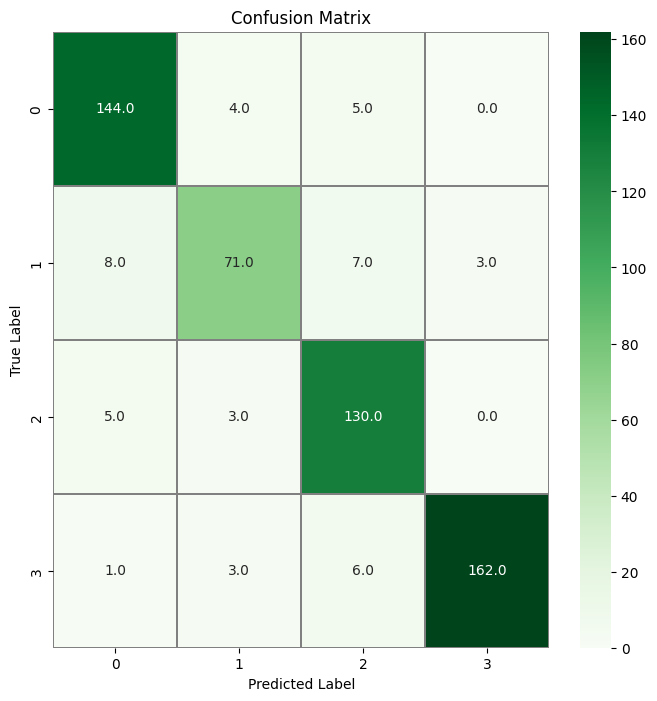

In [ ]:
# confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Predict the values from the validation dataset
y_pred = model2.predict(X_test)
# Convert predictions classes to one hot vectors
y_pred_classes = np.argmax(y_pred,axis = 1)
# Convert validation observations to one hot vectors
y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Assuming you have already defined the 'model2', 'X_test', and 'y_test' variables

# Get model predictions
y_pred = model2.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Create a classification report
class_names = ["can", "cardboard", "glass bottle", "plastic bottle"]
report = classification_report(y_true_classes, y_pred_classes, target_names=class_names)

# Print the classification report
print("Classification Report:")
print(report)

18/18 [==============================] - 0s 18ms/step
Classification Report:
                precision    recall  f1-score   support

           can       0.91      0.94      0.93       153
     cardboard       0.88      0.80      0.84        89
  glass bottle       0.88      0.94      0.91       138
plastic bottle       0.98      0.94      0.96       172

      accuracy                           0.92       552
     macro avg       0.91      0.91      0.91       552
  weighted avg       0.92      0.92      0.92       552



In [ ]:
from google.colab import data_table

data_table.enable_dataframe_formatter()

report = pd.DataFrame.from_dict(report)
report

,can,cardboard,glass bottle,plastic bottle,accuracy,macro avg,weighted avg
precision,0.911392,0.876543,0.878378,0.981818,0.918478,0.912033,0.919464
recall,0.941176,0.797753,0.942029,0.941860,0.918478,0.905705,0.918478
f1-score,0.926045,0.835294,0.909091,0.961424,0.918478,0.907964,0.918199
support,153.000000,89.000000,138.000000,172.000000,0.918478,552.000000,552.000000


18/18 [==============================] - 0s 23ms/step


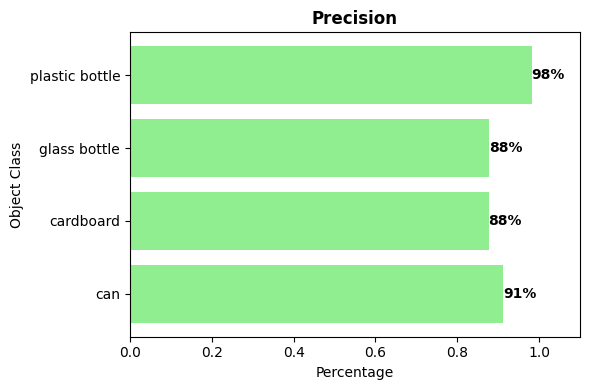

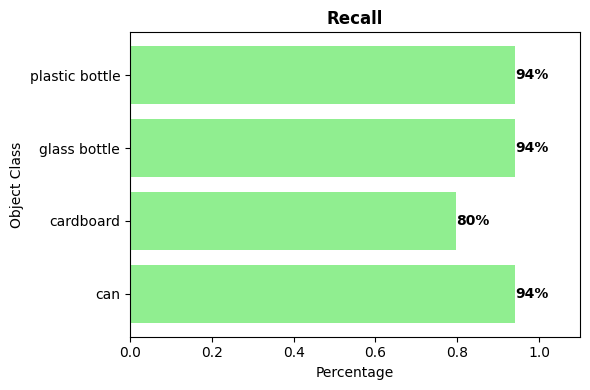

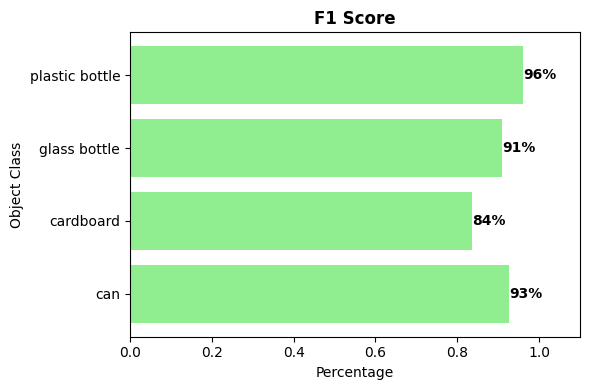

In [ ]:
# Get model predictions
y_pred = model2.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Create a classification report
class_names = ["can", "cardboard", "glass bottle", "plastic bottle"]
report = classification_report(y_true_classes, y_pred_classes, target_names=class_names, output_dict=True)

# Extract metrics for each class
precision = [report[class_name]['precision'] for class_name in class_names]
recall = [report[class_name]['recall'] for class_name in class_names]
f1_score = [report[class_name]['f1-score'] for class_name in class_names]

# Plot Precision
plt.figure(figsize=(6, 4))
plt.barh(class_names, precision, color='lightgreen')
plt.xlim(0, 1.1)
plt.title("Precision", fontweight='bold')
plt.xlabel("Percentage")
plt.ylabel("Object Class")
for i, v in enumerate(precision):
    plt.text(v, i, f'{v*100:.0f}%', ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.savefig("precision_chart.png")
plt.show()

# Plot Recall
plt.figure(figsize=(6, 4))
plt.barh(class_names, recall, color='lightgreen')
plt.xlim(0, 1.1)
plt.title("Recall", fontweight='bold')
plt.xlabel("Percentage")
plt.ylabel("Object Class")
for i, v in enumerate(recall):
    plt.text(v, i, f'{v*100:.0f}%', ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.savefig("recall_chart.png")
plt.show()

# Plot F1 Score
plt.figure(figsize=(6, 4))
plt.barh(class_names, f1_score, color='lightgreen')
plt.xlim(0, 1.1)
plt.title("F1 Score", fontweight='bold')
plt.xlabel("Percentage")
plt.ylabel("Object Class")
for i, v in enumerate(f1_score):
    plt.text(v, i, f'{v*100:.0f}%', ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.savefig("f1_score_chart.png")
plt.show()

In [ ]:
highest_precision_idx

3

1/1 [==============================] - 0s 232ms/step


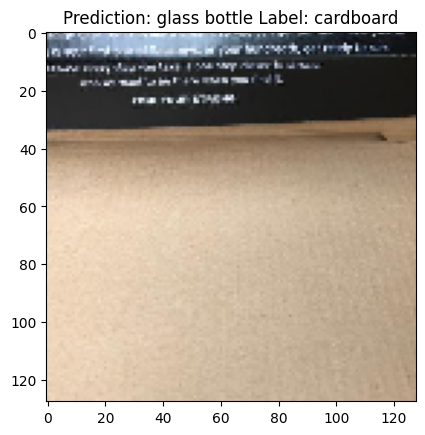

1/1 [==============================] - 0s 34ms/step


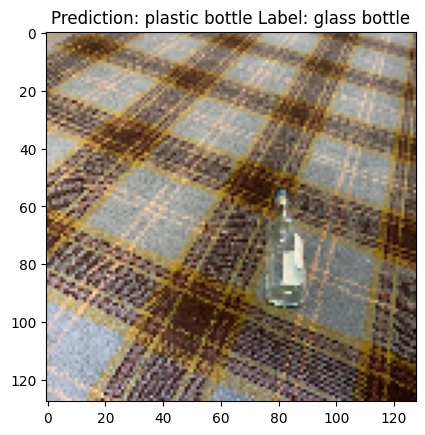

1/1 [==============================] - 0s 22ms/step


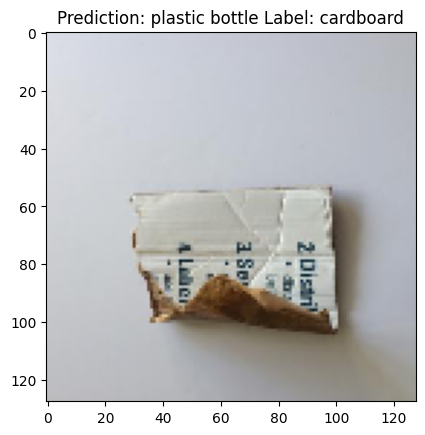

1/1 [==============================] - 0s 19ms/step


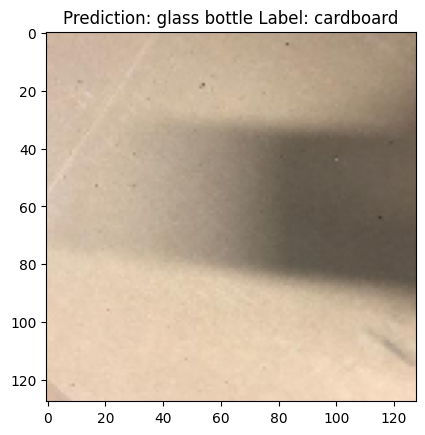

1/1 [==============================] - 0s 59ms/step


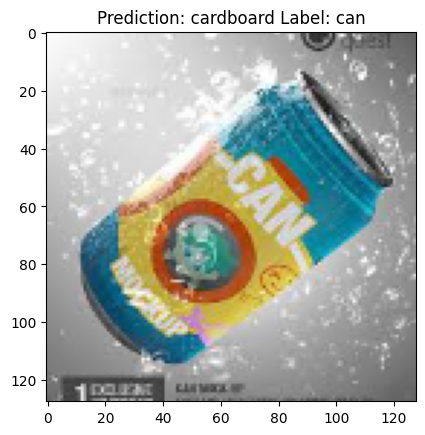

1/1 [==============================] - 0s 38ms/step


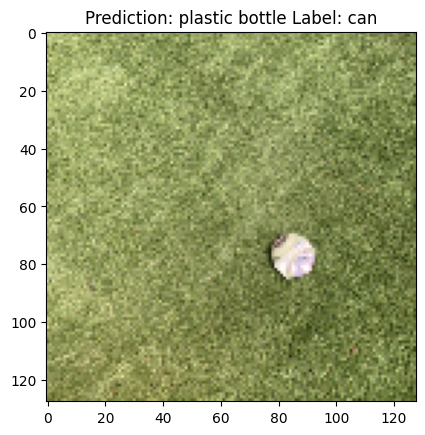

1/1 [==============================] - 0s 23ms/step


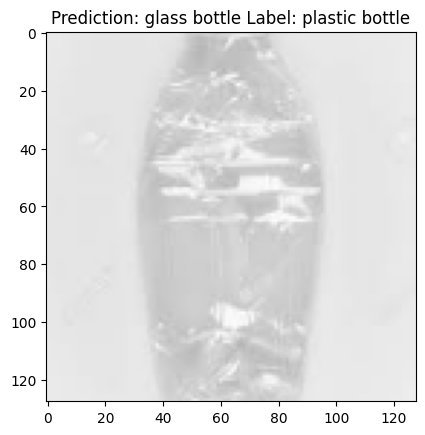

1/1 [==============================] - 0s 21ms/step


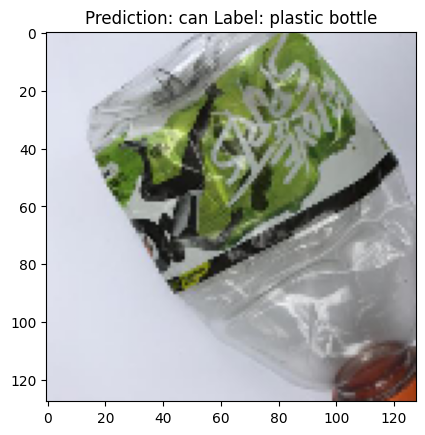

1/1 [==============================] - 0s 18ms/step


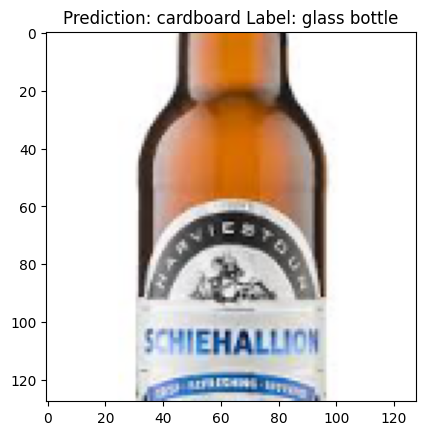

1/1 [==============================] - 0s 28ms/step


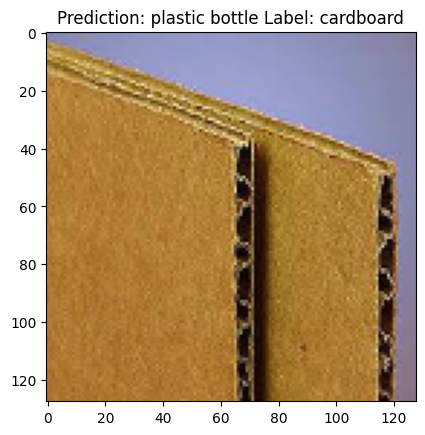

1/1 [==============================] - 0s 20ms/step


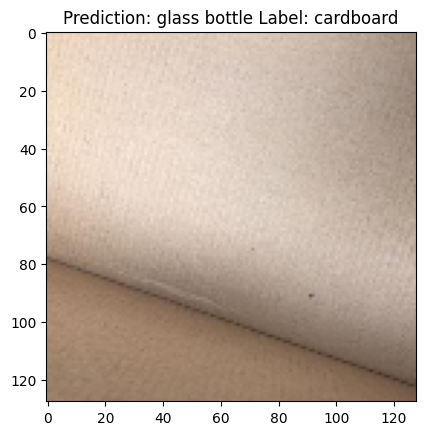

1/1 [==============================] - 0s 42ms/step


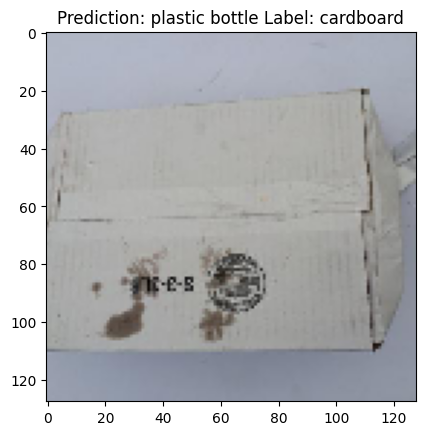

1/1 [==============================] - 0s 53ms/step


In [ ]:
class_names = ['can', 'cardboard', 'glass bottle', 'plastic bottle']

for x in range(100):
    test_image = X_test[x,:]
    predicted_cat = model2.predict(np.array([test_image])).argmax()
    label = y_test[x].argmax()
    if (predicted_cat != label):
        plt.title('Prediction: %s Label: %s' % (class_names[predicted_cat], class_names[label]))
        plt.imshow(test_image)
        plt.show()